# Hello everyone

This is my first attempt to build a CNN from scratch. Untill now I am just doing models from 'from keras.dataset import ...', so I hope it works fine (and works as you see at the end and I am very happy with the results)

I will describe as clearly as possible for you if you're a beginner and for myself because I probably gonna use this notebook as my future guides as well. So I want you to understand clearly what I am doing

At the end of the page I'm gonna put some notes just for justify some stuffs I know that can be written in another way or why I'm importing x library since y library can do the same.

So lets begin ...

In [1]:
import keras
from keras.preprocessing import image
from glob import glob
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Note that even it is a jupyter notebook file I not: using %matplotlib inline
    
The reason is just because it is easier to run if I download it as .py

I am using the kaggle's notebook path for the train folder and we don't need the test for this project. We gonna create and train our network for those images and thats all.

I write ROW and COL in uppercase because this is the way I learn and used to write my codes with Keras so it is a way to differentiate things that are more important or belong to Keras parte from the most part of code but in this case, we need these variables to resize our image.

In [2]:
path = '../input/train/'

ROW, COL = 96, 96

In [3]:
dogs, cats = [], []
y_dogs, y_cats = [], []

# Data Preprocessing

Ok. I am like to separate Cats from Dogs (because they tend to fight each other - just kidding). To be honest I don't think you need to do this but I think it is a better way to understand what I am doing and best if you someday need to use this way for a further projects.

y_dogs and y_cats are my labels.

The code bellow are just a definition and selfexplanatory but lets see

I am getting all 'dog' images. In this case there are just .jpg in this folder so it is unnecessary to write things like 'dog*.jpg' and for each dog image (dog_img) I am creating a variable for save all transformations I am going to do.

Read an image then change its color to gray because there are more variables that differentiate a dog from a cat. Resize this image for an OK size (I've tested it and 50x50px still nice but lets use 96x96px) and then convert it into array. If you don't convert it's ok but to read and proccess images as images itself is slower than to proccess them as arrays

In [4]:
def load_dogs():
    print('Loading all dog images\n')
    dog_path = os.path.join(path, 'dog*')
    for dog_img in glob(dog_path):
        dog = cv2.imread(dog_img)
        dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
        dog = cv2.resize(dog, (ROW, COL))
        dog = image.img_to_array(dog)
        dogs.append(dog)
    print('All dog images loaded')

In [5]:
def load_cats():
    print('Loading all cat images\n')
    cat_path = os.path.join(path, 'cat*')
    for cat_img in glob(cat_path):
        cat = cv2.imread(cat_img)
        cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
        cat = cv2.resize(cat, (ROW, COL))
        cat = image.img_to_array(cat)
        cats.append(cat)
    print('All cat images loaded')

In [6]:
load_dogs()

Loading all dog images

All dog images loaded


In [7]:
print('#################################')

#################################


In [8]:
load_cats()

Loading all cat images

All cat images loaded


In [9]:
print('Lenght of our dogs array: {}\nLenght of our cats array: {}'.format(len(dogs),len(cats)))

Lenght of our dogs array: 12500
Lenght of our cats array: 12500


Everything is ok. We need exactly 12,500 for cats and 12,500 for dogs

In [10]:
classes = ['dog', 'cat']

Acctually it is another step that you can skip (with propper changes with code bellow) but to make it more clearly I am gonna make it explicity that our classes are 'dog' and 'cat'.

And bellow I am just want to see if our code store everything correctly. You know. Sometimes it is easier to work with arrays but are you sure that those numbers means what you whant to they supposed to mean?

In [11]:
import random

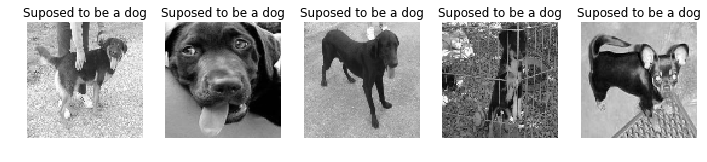

In [12]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Suposed to be a {}'.format(classes[0]))
    
plt.show()

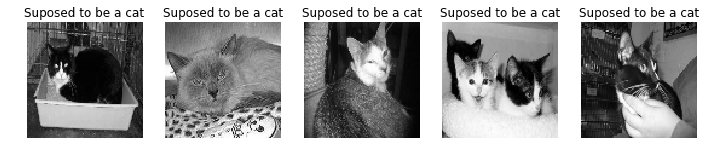

In [13]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Suposed to be a {}'.format(classes[1]))
    
plt.show()

Nice. They mean what I want to.

But my computer doesn't understand what dogs and cats are but it knew very well what a 0 and 1 means.

Lets give these labels 1 for dogs and 0 for cats, as Kaggle inform.

In [14]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [15]:
print('Len of dogs labels: {}\nLen of cats labels: {}'.format(len(y_dogs), len(y_cats)))

Len of dogs labels: 12500
Len of cats labels: 12500


# Almost done for data preprocessing

What I am going to do is to write an X file for our trainning just like the convetion. Put all my values into one array and them I am going to normalize my X just to fit values between 0 and 1 and for this reason I need to specify that my X is a float type

For my y vales or my labels I am just writing them as one array also because we need to use like this to make what is called: One-hot encoding.

In [16]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')
dogs /= 255
cats /= 255

In [17]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

# Start our CNN model

In [18]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

Now I am just setting my network from what is called Convolution Neural Network. Those variables are not arbitrary and you can change for and from your necessity but the composition for being a CNN still remmaing:

Convolutional -> Convolutional -> MaxPooling -> Convolutional -> Convolutional -> MaxPooling

As I said those variables are not arbitrary but I am happy with my results. I'm not gonna explain everything. The harder part is over with our data pre processing.

Now I suggest you to learn more about networks because it worth. Even myself still very beginner.

We gonna run this network for 100 epochs and I think it is enought to get a great result.

One more thing. I am changing my y again, passing my labels to a matrice that can be 0 or 1, deppending on what my model learn and for this I said that I have 2 classes getting from the lenght of my classes variable which in my opinion is a great way to inform to your model how manny classes you have.

In [19]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 100
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [20]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding done')

One-Hot Encoding done


In [21]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

In [22]:
print('The model was created by following config:')
model.summary()

The model was created by following config:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [24]:
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_redux_checkpoint.h5')

Everything setted up so ...

# Lets run our model

In [25]:
print('#################################')
print('########### RUNNING #############')
model.fit(X, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT, verbose=VERBOSE)

#################################
########### RUNNING #############
Train on 20000 samples, validate on 5000 samples
Epoch 1/100
 - 34s - loss: 0.6406 - acc: 0.6409 - val_loss: 1.1605 - val_acc: 0.1224
Epoch 2/100
 - 29s - loss: 0.5443 - acc: 0.7221 - val_loss: 0.5805 - val_acc: 0.7494
Epoch 3/100
 - 29s - loss: 0.4889 - acc: 0.7659 - val_loss: 0.5998 - val_acc: 0.7072
Epoch 4/100
 - 29s - loss: 0.4385 - acc: 0.7942 - val_loss: 0.8819 - val_acc: 0.5444
Epoch 5/100
 - 29s - loss: 0.3935 - acc: 0.8199 - val_loss: 0.6601 - val_acc: 0.6938
Epoch 6/100
 - 29s - loss: 0.3500 - acc: 0.8456 - val_loss: 0.5590 - val_acc: 0.7262
Epoch 7/100
 - 29s - loss: 0.3012 - acc: 0.8695 - val_loss: 0.4467 - val_acc: 0.8062
Epoch 8/100
 - 29s - loss: 0.2486 - acc: 0.8930 - val_loss: 0.4407 - val_acc: 0.8088
Epoch 9/100
 - 29s - loss: 0.2057 - acc: 0.9158 - val_loss: 0.4288 - val_acc: 0.8218
Epoch 10/100
 - 29s - loss: 0.1600 - acc: 0.9357 - val_loss: 0.7359 - val_acc: 0.7328
Epoch 11/100
 - 29s - loss: 0.12

In [27]:
print('########### SCORES ##############')
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY\n{}: {}'.format(model.metrics_names[1], scores[1]*100))

########### SCORES ##############
MODEL ACCURACY
acc: 96.576


In terms of building a CNN everything was done by what I learn by watching DeepLizard videos and read in Deep Learning with Keras by Antonio Gulli, Sujit Pal

To pre processing my data I want to give a special thanks to sentdex and RMOTR.

This file is kind different from my .py because I take some advantage of Kaggles kernel and run it for 100 epochs in my .py I was using my GTX 1050 so I just run for 40 epochs because I don't think it is really necessary to run up to this and because it put so much stress for a notebook :P

But in case you run with only 40 epochs the result was "acc: 95.38799999999999%". Pretty close to 100 epochs.

Well. That is it. I hope you enjoy this model.